<a href="https://colab.research.google.com/github/g0pher98/pytorch-study/blob/main/chap4_pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1. 텐서
텐서 : 파이토치 기본단위. GPU 연산 가능

In [ ]:
import numpy as np
import torch

x = torch.empty(5, 4)
x

tensor([[5.3829e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5733e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5733e-43, 0.0000e+00, 4.9045e-44, 0.0000e+00]])

`torch.empty()` 메소드를 통해 5x4 빈 tensor를 만들 수 있음. 초기화 되지 않으면 메모리에 남아있던 값이 나옴.

In [ ]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.rand(2, 3)

tensor([[0.2065, 0.3269, 0.1896],
        [0.3309, 0.3655, 0.9001]])

In [ ]:
# list -> numpy -> tensor
pylist = [[101, 102, 103], [201, 202, 203]]
np_arr = np.array(pylist)

tensor_x = torch.tensor(np_arr)
tensor_x

tensor([[101, 102, 103],
        [201, 202, 203]])

In [ ]:
tensor_x.size() # 텐서의 크기

torch.Size([2, 3])

In [ ]:
# 파라미터를 넘기거나 크기 데이터의 인덱싱을 이용해서
# Size의 특정 값에 접근할 수 있음
tensor_x.size(0), tensor_x.size()[1] 

(2, 3)

In [ ]:
type(tensor)

torch.Tensor

In [ ]:
X = torch.rand(3, 4)
Y = torch.rand(3, 4)

X, Y

(tensor([[0.2311, 0.1107, 0.2458, 0.1206],
         [0.2129, 0.7111, 0.1304, 0.5766],
         [0.2014, 0.8471, 0.5790, 0.3286]]),
 tensor([[0.4019, 0.8832, 0.3837, 0.6055],
         [0.8162, 0.4225, 0.4448, 0.8507],
         [0.7307, 0.8227, 0.9568, 0.0853]]))

In [ ]:
X+Y == X.add(Y) # numpy처럼 행렬 연산 가능. add처럼 함수로도 가능.

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [ ]:
X.add_(Y) # 연산 결과가 X로 덮어씌워짐.
X

tensor([[0.6330, 0.9939, 0.6295, 0.7261],
        [1.0291, 1.1336, 0.5752, 1.4272],
        [0.9322, 1.6698, 1.5358, 0.4140]])

In [ ]:
tensor

tensor([[101, 102, 103],
        [201, 202, 203]])

In [ ]:
resized_tensor = tensor.view([6])
resized_tensor

tensor([101, 102, 103, 201, 202, 203])

In [ ]:
resized_tensor = tensor.view([-1, 2, 1]) # -1은 auto
resized_tensor

tensor([[[101],
         [102]],

        [[103],
         [201]],

        [[202],
         [203]]])

In [ ]:
np_array = tensor.numpy()
np_array

array([[101, 102, 103],
       [201, 202, 203]])

In [ ]:
type(np_array)

numpy.ndarray

In [ ]:
x = torch.ones(1).view(-1,1,1,1,1,1) # 모양이 어떻든
x.item() # 숫자가 하나인 텐서를 텐서4가 아닌 값으로 변환해줌

1.0

# 4.2. 역전파

학습이 잘 되기 위해 모델 파라미터를 최적화하는데, 여기에 사용되는게 미분의 성질을 이용한 역전파.

모델이 복잡해질수록 계산 과정이 복잡해져서 코드를 구현하기에는 어려움이있다. 파이토치는 간단하게 이를 구현할 수 있는 다양한 최적화 방법을 제공한다.

In [ ]:
'''
그래디언트 텐서
'''
import torch

# requires_grad : 해당 텐서를 기준으로 모든 연산을 추적
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
y = x + 1
y

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [ ]:
z = 2*(y**2)
z

tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)

In [ ]:
r = z.mean()
r

tensor(8., grad_fn=<MeanBackward0>)

In [ ]:
r.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

`r.backward()`는 r을 기준으로 역전파를 진행하겠다는 의미.
- $r=\frac{z_1+z_2+z_3+z_4}{4}$
- $z_i=2y_i^2=2(x_i+1)^2$
- $\frac{dr}{dx_i}=x_i+1$

따라서 미분 결과는 모두 2가 된다.

In [ ]:
'''
자동 미분 - 선형회귀 식
'''
import torch
from matplotlib import pyplot as plt

x = torch.FloatTensor(range(5)).unsqueeze(1) # 2차원으로 reshape
x, x.shape

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.]]), torch.Size([5, 1]))

In [ ]:
y = 2*x + torch.rand(5, 1)
y

tensor([[0.8850],
        [2.3931],
        [4.5562],
        [6.1175],
        [8.7100]])

In [ ]:
# instance가 5개, feature가 1개
num_features = x.shape[1]

In [ ]:
# y=wx+b. 일단 초기값은 테스트니까 랜덤으로.
w = torch.randn(num_features, 1, requires_grad=True) # (5,1)
b = torch.randn(1, requires_grad=True)

In [ ]:
# 가중치 업데이트는 Stochastic Gradient Descent(SGD) 알고리즘 사용.
optimizer = torch.optim.SGD([w, b], lr=1e-3)

In [ ]:
loss_stack = []
for epoch in range(1001):
  optimizer.zero_grad() # 최적화 계산 과정에서 누적된 값을 초기화.
  y_hat = torch.matmul(x, w) + b
  loss = torch.mean((y_hat - y) ** 2) # MSE Loss 값 계산
  loss.backward() # loss tensor를 기준으로 역전파
  optimizer.step() # 최적화 시행
  loss_stack.append(loss.item())

  if epoch % 100 == 0:
    print(f"Epoch {epoch:5d}: {loss.item()}")

Epoch     0: 30.915943145751953
Epoch   100: 2.8283164501190186
Epoch   200: 0.8606087565422058
Epoch   300: 0.6592422723770142
Epoch   400: 0.5844942927360535
Epoch   500: 0.5251542329788208
Epoch   600: 0.4729638695716858
Epoch   700: 0.42667970061302185
Epoch   800: 0.3856072723865509
Epoch   900: 0.34915822744369507
Epoch  1000: 0.31681153178215027


In [ ]:
with torch.no_grad(): # requires_grad가 동작하지 않는 상태에서 코드 실행
  y_hat = torch.matmul(x, w) + b

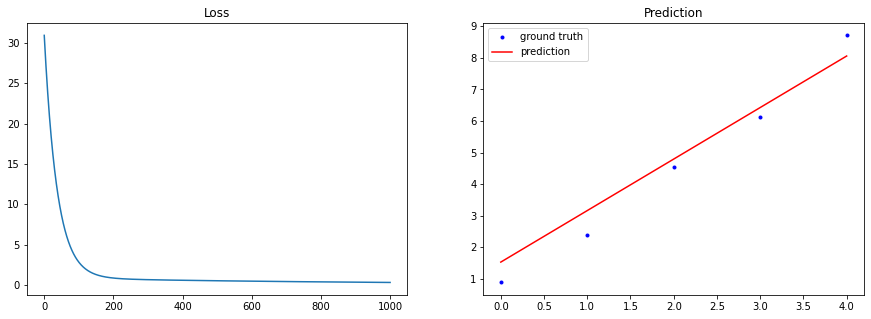

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")

plt.show()

# 4.3. 데이터 불러오기

In [1]:
'''
4.3.1. 파이토치 제공 데이터 사용
'''
import torch
import torchvision # 비전 관련
import torchvision.transforms as tr # 비전 전처리 관련
from torch.utils.data import DataLoader, Dataset # 데이터 가공
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transf = tr.Compose([ # 전처리 과정을 Compose로 원툴로 만듦
    tr.Resize((16, 16)),
    tr.ToTensor()
])
transf

Compose(
    Resize(size=(16, 16), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

In [3]:
# torchvision.datasets 에서 제공하는 CIFAR 이미지 데이터셋 다운로드.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

trainset

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(16, 16), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [4]:
print(type(trainset)) # ==> tuple (dataset, label)
trainset[0][0].size() # 채널 정보가 맨 앞에 온다,,! @_@ 헷갈리것다,,

<class 'torchvision.datasets.cifar.CIFAR10'>


torch.Size([3, 16, 16])

In [5]:
# DataLoader는 데이터를 미니배치 형태로 만들어줌. batch size나 shuffle 여부를 설정할 수 있음.
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=True)

trainloader

In [6]:
len(trainloader) # 5만장 / batch_size(50) = 1000

1000

In [7]:
images, labels = iter(trainloader).next() # 첫 번째 batch를 load
images.size() # 16x16 resized image 50장을 얻을 수 있음

torch.Size([50, 3, 16, 16])

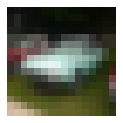

In [8]:
oneshot = images[1].permute(1,2,0).numpy() # permute로 index 위치를 바꾼다. 채널을 가장 뒤로!
plt.figure(figsize=(2, 2))
plt.imshow(oneshot)
plt.axis('off')
plt.show()

In [10]:
'''
4.3.2. 같은 클래스 별로 폴더를 정리한 경우

    - 별도의 라벨링 없이 폴더별로 자동 라벨링됨.
'''
transf = tr.Compose([tr.Resize(128), tr.ToTensor()])

# 예시 데이터가 없어서 주석처리. 상황에 맞게 사용하면 될듯.

#trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf)
#trainloader = DataLoader(trainset, batch_size=1, shuffle=False)

In [11]:
'''
4.3.3. 정리되지 않은 커스텀 데이터 불러오기

    - 메소드로 해결이 안되는 구조의 데이터인 경우 필요.
'''

class CustomData(Dataset):
  ''' 커스텀 데이터를 로드하는 클래스 '''

  def __init__(self, x_data, y_data):
    self.x_data = torch.FloatTensor(x_data)
    self.x_data = self.x_data.permute(0,3,1,2) # 채널 값을 앞으로 옮긴다.
    self.y_data = torch.LongTensor(y_data)
    self.len = self.y_data.shape[0]

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]
  
  def __len__(self):
    return self.len

In [14]:
train_images = np.random.randint(256, size=(100, 32, 32, 3)) / 255
train_labels = np.random.randint(2, size=(100, 1))

# 커스텀 클래스를 이용해서 데이터셋으로 만듦
trainset = CustomData(train_images, train_labels)
trainloader = DataLoader(trainset, batch_size=10, shuffle=False)

trainloader

In [15]:
'''
4.3.4. 커스텀 데이터와 커스텀 전처리 사용하기
'''

# 커스텀 전처리 클래스를 생성해서 tr.Compose([ToTensor(), CutOut()])를 완성시킨다.

class ToTensor:
  
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2, 0, 1) # 채널 값을 앞으로 옮김.
    return inputs, torch.LongTensor(labels)

In [17]:
class CutOut:
  ''' 
  cutout
    : 이미지 내부에 무작위의 사각형 영역을 선택하여 0으로 만듦.
      => 데이터 증식 방법 중 하나.
  '''

  def __init__(self, ratio=.5):
    self.ratio = int(1/ratio)
  
  def __call__(self, sample):
    inputs, lables = smaple
    active = int(np.random.randint(0, self.ratio, 1))

    if active == 0:
      _, w, h = inputs.size()
      min_len = min(w, h)
      box_size = int(min_len // 4)
      idx = int(np.random.randint(0, min_len-box_size, 1))
      inputs[:,idx:idx+box_size,idx:idx+box_size] = 0

    return inputs, labels